<a href="https://colab.research.google.com/github/Aleksandr62aa/ML_DL/blob/main/CNN_LeNet5_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Classification of handwritten numbers by convolution
    neural network**

**Dataset MNIST**

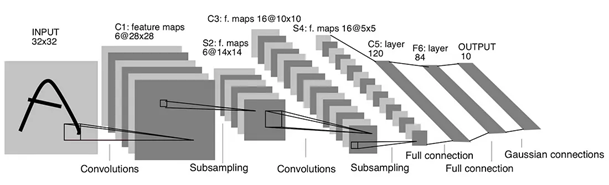

**Figure**

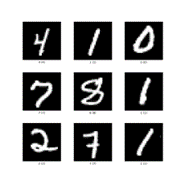

**LeNet5:**

**Conv 5x5** --> **2 Conv 3x3**.

**Tanh** --> **ReLu**.

**Average Pooling**  --> **Max Pooling**.

**BatchNorm**

**Importing libraries**

In [1]:
import torch
import random
import numpy as np
import torchvision.transforms as transforms
import torchvision.datasets
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor
from PIL import Image

# Fixed seed
random.seed(1)
np.random.seed(1)
torch.manual_seed(1)
torch.cuda.manual_seed(1)
torch.backends.cudnn.deterministic = True

In [2]:
# Hyperparameters
batch_size = 100
learning_rate = 1.0e-3
num_epochs = 15

In [3]:
# GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

**Train Test dataset**

In [4]:
train_MNIST = torchvision.datasets.MNIST('./', download=True, train=True, transform=ToTensor())
test_MNIST = torchvision.datasets.MNIST('./', download=True, train=False, transform=ToTensor())

train_dataloader_MNIST = torch.utils.data.DataLoader(
    train_MNIST, batch_size=batch_size, shuffle=True, num_workers=batch_size)

test_dataloader_MNIST = torch.utils.data.DataLoader(
    test_MNIST, batch_size=batch_size, shuffle=False, num_workers=0)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 100 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [5]:
print(len(train_MNIST), len(train_dataloader_MNIST))
print(len(test_MNIST), len(test_dataloader_MNIST))

60000 600
10000 100


**Image**

In [6]:
def image_plot(x):
  plt.imshow(x.permute(1, 2, 0), cmap='gray')

number = 4


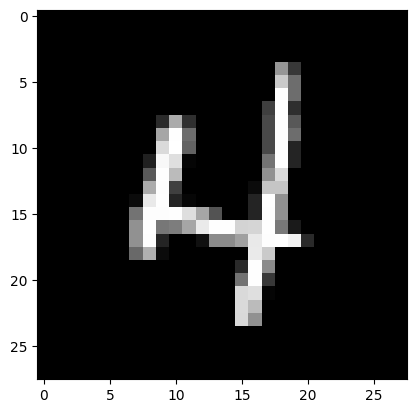

In [7]:
X_batch, y_batch = next(iter(train_dataloader_MNIST))
image_plot(X_batch[0])
print ("number =", y_batch[0].data.numpy());

**Model CNN**

In [8]:
class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.model = torch.nn.Sequential(
          # conv1
          torch.nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, padding=1),
          torch.nn.Conv2d(in_channels=6, out_channels=6, kernel_size=3, padding=1),
          torch.nn.ReLU(),
          #torch.nn.BatchNorm2d(num_features=6),
          torch.nn.MaxPool2d(kernel_size=2, stride=2),
          # conv2
          torch.nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3, padding=0),
          torch.nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, padding=0),
          torch.nn.ReLU(),
          torch.nn.BatchNorm2d(num_features=16),
          torch.nn.AvgPool2d(kernel_size=2, stride=2),
          # conv3
          torch.nn.Flatten(),
          # FC1
          torch.nn.Linear(5 * 5 * 16, 120),
          torch.nn.ReLU(),
          # torch.nn.BatchNorm1d(num_features=120),
          # FC2
          torch.nn.Linear(120, 84),
          torch.nn.Sigmoid(),
          # torch.nn.BatchNorm1d(num_features=84),
          torch.nn.Linear(84, 10)
        )

    def forward(self, x):
        return self.model(x)

model = LeNet5().to(device)

**Loss function**

In [9]:
loss_fn = torch.nn.CrossEntropyLoss()

**Optimizer**

In [10]:
optimizer = torch.optim.Adam(model .parameters(), lr=learning_rate)

**Training procedure**

In [11]:
test_accuracy_history = []
test_loss_history = []

for epoch in range(num_epochs):
  for batch in train_dataloader_MNIST:
      optimizer.zero_grad()
      model.train()

      X_batch, y_batch = batch

      X_batch = X_batch.to(device)
      y_batch = y_batch.to(device)

      y_preds = model(X_batch)

      loss_train = loss_fn(y_preds, y_batch)

      loss_train.backward()
      optimizer.step()

  running_loss = 0.
  running_acc = 0.

  for batch in test_dataloader_MNIST:
      model.eval()
      X_batch, y_batch = batch

      X_batch = X_batch.to(device)
      y_batch = y_batch.to(device)

      y_preds = model(X_batch)

      running_loss += loss_fn(y_preds, y_batch).item()
      running_acc += (y_preds.argmax(dim=1) == y_batch.data).float().mean().cpu()

  epoch_loss = running_loss / len(test_dataloader_MNIST)
  test_loss_history.append(epoch_loss)

  epoch_acc = running_acc / len(test_dataloader_MNIST)
  test_accuracy_history.append(epoch_acc)

  print(f"Epoch:{epoch} loss_train is {loss_train.item()}")
  print(f"accuracy_test:{epoch_acc} loss_test is {epoch_loss}")


Epoch:0 loss_train is 0.05181706324219704
accuracy_test:0.9746997952461243 loss_test is 0.09235593901947141
Epoch:1 loss_train is 0.02124781161546707
accuracy_test:0.984799861907959 loss_test is 0.05340049495222047
Epoch:2 loss_train is 0.025257419794797897
accuracy_test:0.981200098991394 loss_test is 0.06121615005191416
Epoch:3 loss_train is 0.004898257087916136
accuracy_test:0.9892999529838562 loss_test is 0.036324474642751736
Epoch:4 loss_train is 0.045197729021310806
accuracy_test:0.991599977016449 loss_test is 0.02956548857036978
Epoch:5 loss_train is 0.01212525274604559
accuracy_test:0.9909000992774963 loss_test is 0.03018721629981883
Epoch:6 loss_train is 0.0025606611743569374
accuracy_test:0.9896000027656555 loss_test is 0.03282727693731431
Epoch:7 loss_train is 0.0029560518451035023
accuracy_test:0.991300106048584 loss_test is 0.033095941249484895
Epoch:8 loss_train is 0.004938172642141581
accuracy_test:0.9899998307228088 loss_test is 0.031861287744832226
Epoch:9 loss_train is

**Result test**

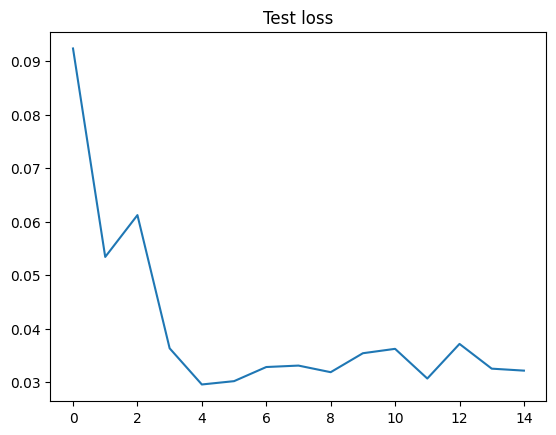

In [12]:
plt.plot(test_loss_history)
plt.title('Test loss');

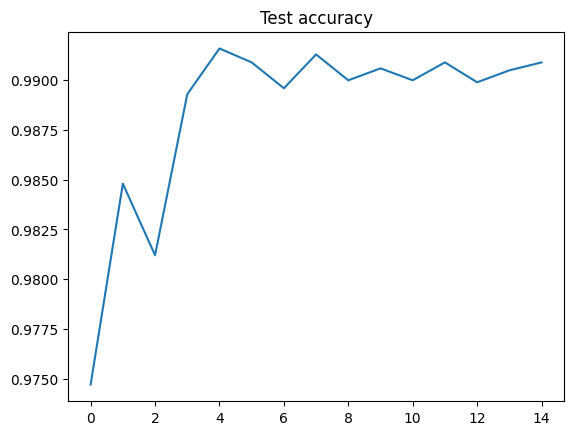

In [13]:
plt.plot(test_accuracy_history)
plt.title('Test accuracy');